IMPORTATION DES LIBRAIRIES

In [122]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

IMPORT DES FICHIERS

In [123]:
df_erp = pd.read_excel('Fichier_erp.xlsx')
df_web = pd.read_excel('fichier_web.xlsx')
df_liaison = pd.read_excel('fichier_liaison.xlsx')

d:\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
d:\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
d:\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


RENOMME LA COLONNE id_web

In [124]:
df_web.rename(columns={'sku': 'id_web'}, inplace=True)

ON REGARDE SI IL Y A DES VALEURS EN DOUBLE

In [125]:
valeurs_en_double = df_erp[df_erp.duplicated('product_id', keep=False)]
print(valeurs_en_double['product_id'].unique())
valeurs_en_double = df_liaison[df_liaison.duplicated('id_web', keep=False)]
print(valeurs_en_double['id_web'].unique())
valeurs_en_double = df_web[df_web.duplicated('id_web', keep=False)]
print(len(valeurs_en_double['id_web']))

[]
[nan]
1513


ON SUPPRIME LES VALEURS EN DOUBLE

In [126]:
df_web = df_web.drop_duplicates(subset='id_web')

Afficher le type et le nombre de valeur pour chaque colonne

In [127]:
print('df erp :\n',df_erp.dtypes)
print(df_erp.count())

df erp :
 product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [128]:
print('df liaison :\n',df_liaison.dtypes)
print(df_liaison.count())

df liaison :
 product_id     int64
id_web        object
dtype: object
product_id    825
id_web        734
dtype: int64


In [129]:
print('df web :\n',df_web.dtypes)

df web :
 id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                    

In [130]:
print(df_web.count())

id_web                   714
virtual                  715
downloadable             715
rating_count             715
average_rating           714
total_sales              714
tax_status               372
tax_class                  0
post_author              714
post_date                714
post_date_gmt            714
post_content               0
post_title               714
post_excerpt             372
post_status              714
comment_status           714
ping_status              714
post_password              0
post_name                714
post_modified            714
post_modified_gmt        714
post_content_filtered      0
post_parent              714
guid                     714
menu_order               714
post_type                714
post_mime_type           342
comment_count            714
dtype: int64


COLONNE id_web OBJECT, ALORS ON CHERCHE LES VALEURS QUI NE SONT PAS DES INT

In [131]:
def is_not_int(value):
    try:
        if value == int(value):
            return False
    except ValueError:
        return True

non_int_values = df_liaison[df_liaison['id_web'].apply(is_not_int)]
print(non_int_values.drop_duplicates(subset='id_web')['id_web'])
non_int_values = df_web[df_web['id_web'].apply(is_not_int)]
print(non_int_values.drop_duplicates(subset='id_web')['id_web'])

19                     NaN
443    bon-cadeau-25-euros
822                13127-1
823                14680-1
Name: id_web, dtype: object
1                      NaN
196    bon-cadeau-25-euros
490                13127-1
Name: id_web, dtype: object


LIAISON DES DATAFRAMES

In [132]:
df_erp_liaison = pd.merge(df_liaison.dropna(subset=['id_web']), df_erp, how = "inner", on="product_id")
print(df_erp_liaison.count())
df_erp_liaison.head()

product_id        734
id_web            734
onsale_web        734
price             734
stock_quantity    734
stock_status      734
dtype: int64


,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [133]:
df_complete = pd.merge(df_web, df_erp_liaison, how = "inner", on="id_web")
df_complete = df_complete[['id_web', 'product_id', 'post_title', 'total_sales', 'onsale_web', 'price']]
df_complete.head()

,id_web,product_id,post_title,total_sales,onsale_web,price
0,16004,4974,Château du Couvent Pomerol 2017,5.0,1,23.0
1,15075,4165,Parés Baltà Penedès Indigena 2017,3.0,1,12.0
2,16209,4174,Maurel Cabardès Tradition 2017,6.0,1,5.7
3,15763,6635,Domaine de la Monardière Vacqueyras Vieilles V...,1.0,1,22.4
4,13895,5796,Château Saransot-Dupré Bordeaux Blanc 2016,0.0,1,12.5


VERIFICATION SI IL EXISTE ENCORE DES DOUBLONS

In [134]:
valeurs_en_double = df_complete[df_complete.duplicated('product_id', keep=False)]
print(valeurs_en_double['product_id'].unique())
valeurs_en_double = df_complete[df_complete.duplicated('id_web', keep=False)]
print(valeurs_en_double['id_web'].unique())

[]
[]


CHIFFRE D'AFFAIRE PAR PRODUIT

In [135]:
df_CA_produit = df_complete.copy()
df_CA_produit['chiffre_affaire'] = df_CA_produit['total_sales'] * df_CA_produit['price']
print(df_CA_produit[['post_title', 'chiffre_affaire']].sort_values(by='post_title'))

                                            post_title  chiffre_affaire
32               Agnès Levet Côte Rôtie Améthyste 2017            164.8
198               Agnès Levet Côte Rôtie Maestria 2017            165.0
88                Agnès Levet Côte Rôtie Péroline 2017            171.0
331         Alain Graillot Crozes-Hermitage Blanc 2018            244.0
581         Alain Graillot Crozes-Hermitage Rouge 2017            146.4
..                                                 ...              ...
30       Zind-Humbrecht Pinot Gris Roche Calcaire 2017              0.0
193        Zind-Humbrecht Riesling Clos Windsbuhl 2014              0.0
31   Zind-Humbrecht Riesling Grand Cru Rangen De Th...              0.0
604  Zind-Humbrecht Riesling Herrenweg de Turckheim...             63.4
531                           Zind-Humbrecht Zind 2017            154.2

[714 rows x 2 columns]


CHIFFRE D'AFFAIRE REALISE EN LIGNE

In [136]:
total_CA = df_CA_produit['chiffre_affaire'].sum()
print("Le chiffre d'affaire total est de :",total_CA,"€")

Le chiffre d'affaire total est de : 65652.6 €


In [137]:
online_CA = df_CA_produit['chiffre_affaire'].loc[df_CA_produit['onsale_web'] == 1].sum()
print("Le chiffre d'affaire total fait en ligne est de :",online_CA,"€")
print(len(df_CA_produit['chiffre_affaire'].loc[df_CA_produit['onsale_web'] == 1]))
print(df_complete['onsale_web'].unique())

Le chiffre d'affaire total fait en ligne est de : 65652.6 €
714
[1]


ANALYSE DES VALEURS ABERANTES

In [138]:
df_complete['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

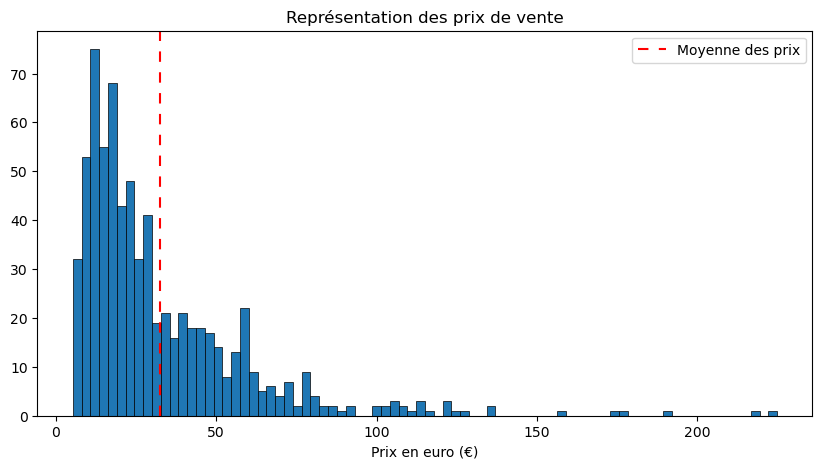

In [139]:
price_mean = df_complete['price'].mean()
vente_mean = df_complete['total_sales'].mean()
plt.figure(figsize=(10, 5))
plt.hist(df_complete['price'], bins=80, edgecolor='black', linewidth=0.5)
plt.axvline(price_mean, color='red', linestyle=(0, (5, 5)), label='Moyenne des prix')
plt.xlabel('Prix en euro (€)')
plt.legend()
plt.title('Représentation des prix de vente')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


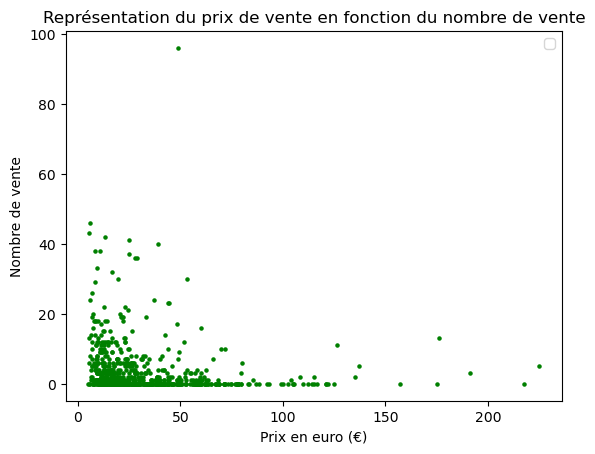

In [140]:
plt.scatter(df_complete['price'], df_complete['total_sales'], marker="o", color = 'green', s= 5)
plt.title('Représentation du prix de vente en fonction du nombre de vente')
plt.xlabel('Prix en euro (€)')
plt.ylabel('Nombre de vente')
plt.legend()
plt.show()

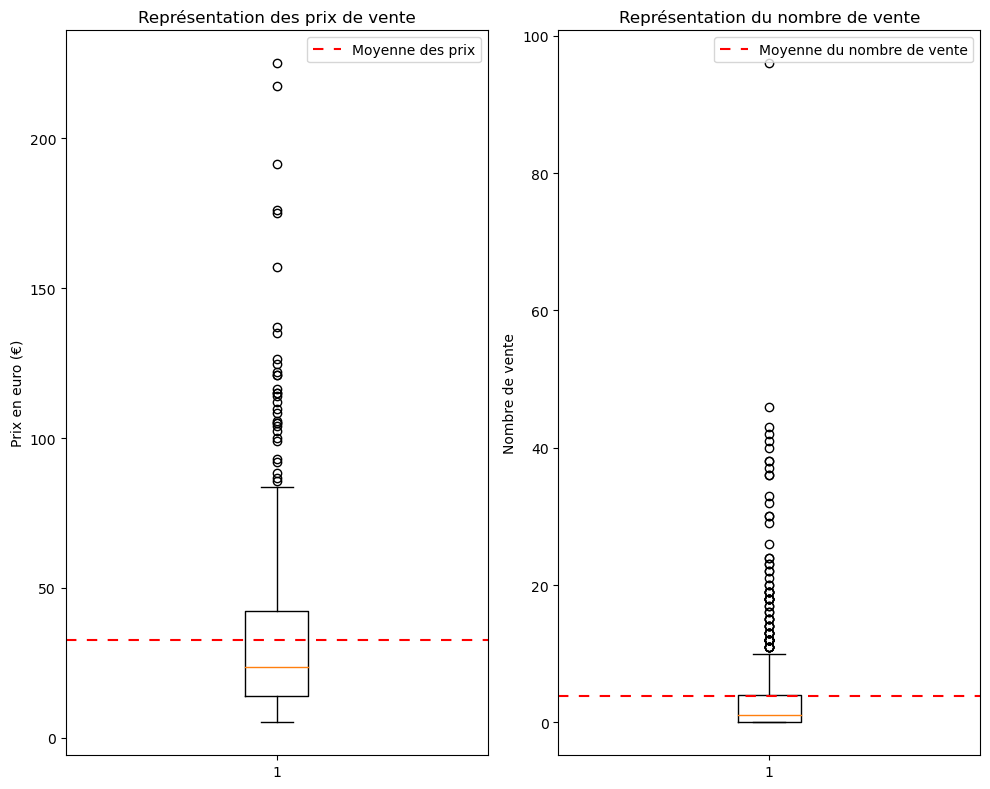

In [141]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.boxplot(df_complete['price'])
plt.axhline(price_mean, color='red', linestyle=(0, (5, 5)), label='Moyenne des prix')
plt.ylabel('Prix en euro (€)')
plt.title('Représentation des prix de vente')
plt.legend()

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, premier graphique
plt.boxplot(df_complete['total_sales'])
plt.axhline(vente_mean, color='red', linestyle=(0, (5, 5)), label='Moyenne du nombre de vente')
plt.ylabel('Nombre de vente')
plt.title('Représentation du nombre de vente')
plt.legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

LISTE DE OUTLIERS AVEC LA METHODE IQR

In [142]:
Q1 = np.percentile(df_complete['price'], 25)
Q3 = np.percentile(df_complete['price'], 75)
iQR = Q3 - Q1
lower_bound = round(Q1 - 1.5 * iQR, 3)
upper_bound = round(Q3 + 1.5 * iQR, 3)
print(lower_bound, upper_bound)
iQR_outliers = df_complete[(df_complete['price'] < lower_bound) | (df_complete['price'] > upper_bound)]
print('nombre outliers :', len(iQR_outliers))
iQR_outliers.head(len(iQR_outliers))

-28.013 84.288
nombre outliers : 32


,id_web,product_id,post_title,total_sales,onsale_web,price
5,12857,4582,Château de Meursault Puligny-Montrachet 1er Cr...,0.0,1,109.6
9,13996,6212,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2.0,1,115.0
23,13913,5026,Champagne Agrapart &amp; Fils Minéral Extra Br...,0.0,1,86.8
31,15382,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0,1,100.0
52,15070,6216,Domaine des Comtes Lafon Volnay 1er Cru Champa...,0.0,1,121.0
56,11602,5008,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,1,105.0
72,14805,4903,Domaine Des Croix Corton Grand Cru Les Grèves ...,0.0,1,102.3
144,11668,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0,1,88.4
179,12791,5007,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,1,105.0
210,11601,6214,Domaine des Comtes Lafon Volnay 1er Cru Champa...,0.0,1,99.0


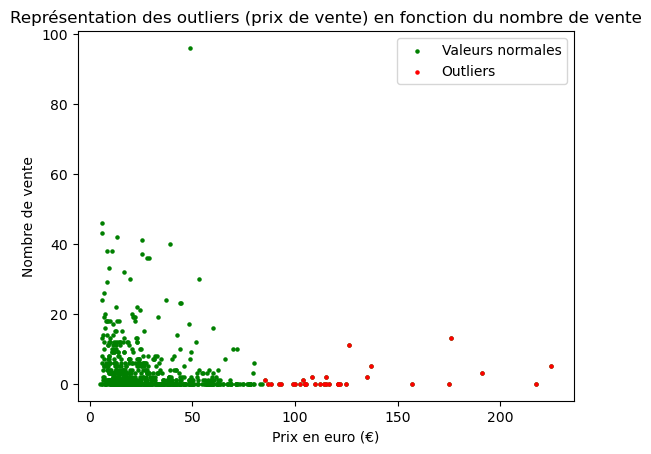

In [143]:
plt.scatter(df_complete['price'], df_complete['total_sales'], marker="o", color = 'green', s= 5, label='Valeurs normales')
plt.scatter(iQR_outliers['price'], iQR_outliers['total_sales'], marker="o", color = 'red', s= 5, label='Outliers')
plt.title('Représentation des outliers (prix de vente) en fonction du nombre de vente')
plt.xlabel('Prix en euro (€)')
plt.ylabel('Nombre de vente')
plt.legend()
plt.show()

LISTE OUTLIERS AVEC LA METHODE Z-SCORE

In [144]:
mean = np.mean(df_complete['price'])
std = np.std(df_complete['price'])
df_complete['z_scores'] = (df_complete['price'] - mean) / std

In [145]:
Zscore_outliers = df_complete[(df_complete['z_scores'] > 3) | (df_complete['z_scores'] < -3)]
print('nombre outliers :', len(Zscore_outliers))
Zscore_outliers.head(len(Zscore_outliers))

nombre outliers : 14


,id_web,product_id,post_title,total_sales,onsale_web,price,z_scores
52,15070,6216,Domaine des Comtes Lafon Volnay 1er Cru Champa...,0.0,1,121.0,3.184726
264,14581,5001,David Duband Charmes-Chambertin Grand Cru 2014,0.0,1,217.5,6.657068
306,15185,5767,Camille Giroud Clos de Vougeot 2016,0.0,1,175.0,5.127798
310,14915,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.0,1,124.8,3.321461
319,3510,4402,Cognac Frapin VIP XO,13.0,1,176.0,5.163781
382,14220,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,1,137.0,3.760451
383,7819,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,1,157.0,4.480108
388,14775,5917,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,0.0,1,122.0,3.220709
488,15072,6213,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,1,121.0,3.184726
568,15126,6202,Domaine Clerget Echezeaux Grand Cru En Orveaux...,0.0,1,116.4,3.019205


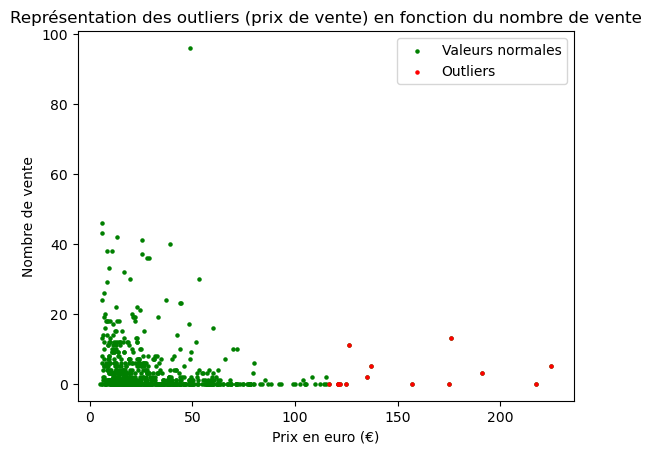

In [146]:
plt.scatter(df_complete['price'], df_complete['total_sales'], marker="o", color = 'green', s= 5, label='Valeurs normales')
plt.scatter(Zscore_outliers['price'], Zscore_outliers['total_sales'], marker="o", color = 'red', s= 5, label='Outliers')
plt.title('Représentation des outliers (prix de vente) en fonction du nombre de vente')
plt.xlabel('Prix en euro (€)')
plt.ylabel('Nombre de vente')
plt.legend()
plt.show()

Incohérence dans les données :
- Valeurs en double
- id_web mal nommée
- Chiffre d'affaire en ligne identique au chiffre d'affaire total (explicable car la colonne 'onsale_web' sert juste à savoir si le produit est présent en ligne)
- Une liste de 32 outliers
- id_web étrange comme 'bon-cadeau-25-euros' ou 13127-1 ou 14680-1
